# Accuracy, Precision, and Computational Cost
---

### 2.3 Accuracy vs. Precision

These two terms are not interchangeable.

* **Accuracy** refers to how close a measured or computed value is to the **true value**.
* **Precision** refers to how close multiple computed values are to **each other**. It is related to the number of significant digits used to represent a value.

Imagine shooting arrows at a target:
* **High Accuracy, High Precision**: Arrows are clustered in the bullseye.
* **Low Accuracy, High Precision**: Arrows are clustered together, but far from the bullseye.
* **High Accuracy, Low Precision**: Arrows are spread out, but centered around the bullseye.
* **Low Accuracy, Low Precision**: Arrows are spread out and far from the bullseye.

The visualization below illustrates this concept.

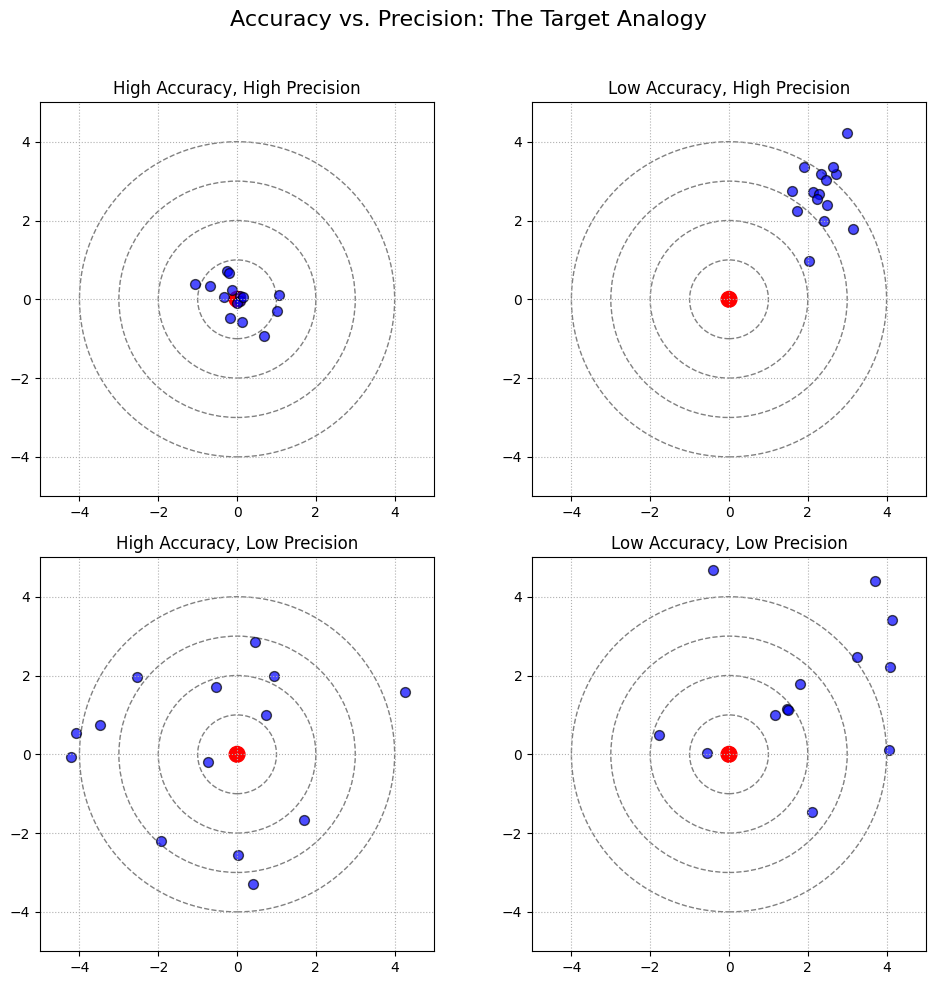

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy_precision():
    """Generates a plot to visualize accuracy vs. precision."""
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Accuracy vs. Precision: The Target Analogy', fontsize=16)
    
    titles = [
        'High Accuracy, High Precision',
        'Low Accuracy, High Precision',
        'High Accuracy, Low Precision',
        'Low Accuracy, Low Precision'
    ]
    
    # Target center
    center_true = (0, 0)

    # Parameters for the shots
    # (mean_x, mean_y, std_dev)
    params = [
        (0, 0, 0.5),      # High Acc, High Prec
        (2.5, 2.5, 0.5),  # Low Acc, High Prec
        (0, 0, 2.0),      # High Acc, Low Prec
        (2.5, 2.5, 2.0)   # Low Acc, Low Prec
    ]

    for ax, title, param in zip(axes.flatten(), titles, params):
        mean_x, mean_y, std = param
        
        # Draw target circles
        for radius in [1, 2, 3, 4]:
            circle = plt.Circle(center_true, radius, color='gray', fill=False, linestyle='--')
            ax.add_artist(circle)
        bullseye = plt.Circle(center_true, 0.2, color='red', fill=True)
        ax.add_artist(bullseye)
        
        # Generate random shots
        shots_x = np.random.normal(mean_x, std, 15)
        shots_y = np.random.normal(mean_y, std, 15)
        
        ax.scatter(shots_x, shots_y, color='blue', s=50, alpha=0.7, edgecolors='black')
        
        ax.set_title(title)
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_aspect('equal', adjustable='box')
        ax.grid(True, linestyle=':')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_accuracy_precision()

### 2.4 Relationship Between Precision and Computational Cost

Higher precision requires more memory to store numbers and more computational effort to perform operations. Modern computers typically offer two main levels of floating-point precision:

* **Single Precision (`float32` in NumPy)**: Uses 32 bits (4 bytes) of memory.
* **Double Precision (`float64` in NumPy)**: Uses 64 bits (8 bytes) of memory. This is the default for Python and NumPy.

While double precision offers a much larger range of representable numbers and lower error, these benefits come at a cost. Operations on `float64` arrays can be slower and consume twice the memory compared to `float32` arrays. This trade-off is critical in fields like high-performance computing, deep learning, and big data, where performance is paramount.

In [3]:
import time

# size uses underscores for readability
def compare_precision_performance(size=10_000_000):
    """Compares the performance of float32 and float64 for a large array operation."""
    # Create large random arrays with different precisions
    array32 = np.random.rand(size).astype(np.float32)
    array64 = np.random.rand(size).astype(np.float64)
    
    # --- Time float32 operations ---
    start_time_32 = time.time()
    result32 = np.sin(array32) * np.cos(array32) # A sample computation
    end_time_32 = time.time()
    duration_32 = end_time_32 - start_time_32
    
    # --- Time float64 operations ---
    start_time_64 = time.time()
    result64 = np.sin(array64) * np.cos(array64) # The same computation
    end_time_64 = time.time()
    duration_64 = end_time_64 - start_time_64
    
    print(f"Array size: {size}\n")
    print(f"Time for float32: {duration_32:.6f} seconds")
    print(f"Time for float64: {duration_64:.6f} seconds\n")
    
    # Memory usage
    mem_32 = array32.nbytes / (1024**2) # in MB
    mem_64 = array64.nbytes / (1024**2) # in MB
    print(f"Memory for float32 array: {mem_32:.2f} MB")
    print(f"Memory for float64 array: {mem_64:.2f} MB")

compare_precision_performance()

Array size: 10000000

Time for float32: 0.064179 seconds
Time for float64: 0.296717 seconds

Memory for float32 array: 38.15 MB
Memory for float64 array: 76.29 MB
